In [1]:
import os
import pandas as pd
import yaml
from src import train


data_name = "test"
config_filepath = os.path.join("configs", f"{data_name}.yaml")
with open(config_filepath) as yml:
    config = yaml.load(yml, Loader=yaml.FullLoader)

filepath = config["dataset"]["filepath"]
prop = config["dataset"]["prop"]
bayopt_bounds = config["bayopt_bounds"]

data = pd.read_csv(filepath)
data = data[["smiles", prop]]
data

,smiles,expt
0,COc1ccc(C(=O)N(C)C)cc1,-11.01
1,CS(=O)(=O)Cl,-4.87
2,C=CC(C)C,1.83
3,CCc1cnccn1,-5.45
4,CCCCCCCO,-4.21
...,...,...
637,CCCCCCCC(=O)OC,-2.04
638,C1CCNC1,-5.48
639,O=Cc1ccc(O)cc1,-8.83
640,CCCCCCCCl,0.29


Seed set to 42


OS: Windows
precision is 32
***Sampling and splitting of the dataset.***

Train/valid/test splits:0.80/0.10/0.10


Setup Molecule Tokens.
***Data augmentation is True***

Enumerated SMILES:


[I 2024-03-17 16:38:13,211] A new study created in memory with name: no-name-dfbb54aa-a7b0-474f-ab28-6e63ed9b293c
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of tokens only present in a training set:33

Number of tokens only present in a validation set25
Is the validation set a subset of the training set:True
What are the tokens by which they differ:set()

Number of tokens only present in a test set:23
Is the test set a subset of the training set:True
What are the tokens by which they differ:set()
Is the test set a subset of the validation set:False
What are the tokens by which they differ:{'-', '3', '[C@]', '[C@@]'}

Full vocabulary: ['#', '(', '/', '\\', '[C@]', '[O-]', 'P', 'O', '4', 'Cl', '=', 'F', 'N', '5', ' ', '[C@@]', '1', 's', '[C@@H]', ')', '[N+]', 'n', '-', 'c', 'C', '3', 'I', '[C@H]', 'Br', '[nH]', '[S+2]', '2', 'S']
Of size: 33

Maximum length of tokenized SMILES: 50 tokens (termination spaces included)



Missing logger folder: ./reports/test\bays_opt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | LSTMAttention    | 155 K 
---------------------------------------------------
155 K     Trainable params
0         Non-trainable params
155 K     Total params
0.624     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 33/33 [00:00<00:00, 132.62it/s, loss=0.015, val_loss=0.015, val_r2=0.919]
`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-03-17 16:38:23,402] Trial 0 finished with value: 0.015252616256475449 and parameters: {'n_lstm_units': 5, 'n_dense_units': 10, 'n_embedding_dim': 8, 'n_batch_size': 7, 'learning_rate': 0.0002051338263087451}. Best is trial 0 with value: 0.015252616256475449.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU co

Best Params
LSTM units       | 16
Dense units      | 8
Embedding units  | 512
Batch size       | 128
learning rate     | 0.0026070247583707684

***Training of the best model.***



Epoch 10: 100%|██████████| 33/33 [00:00<00:00, 141.52it/s, loss=0.009, val_loss=0.010, val_r2=0.944]
`Trainer.fit` stopped: `max_epochs=10` reached.


Training Finished!!!
Best val_loss @ Epoch #9

***Predictions from the best model.***

For the training set:
MAE: 0.7448 RMSE: 0.9701 R^2: 0.9340
For the validation set:
MAE: 0.8276 RMSE: 1.1579 R^2: 0.9395
For the test set:
MAE: 1.0073 RMSE: 1.2066 R^2: 0.8626


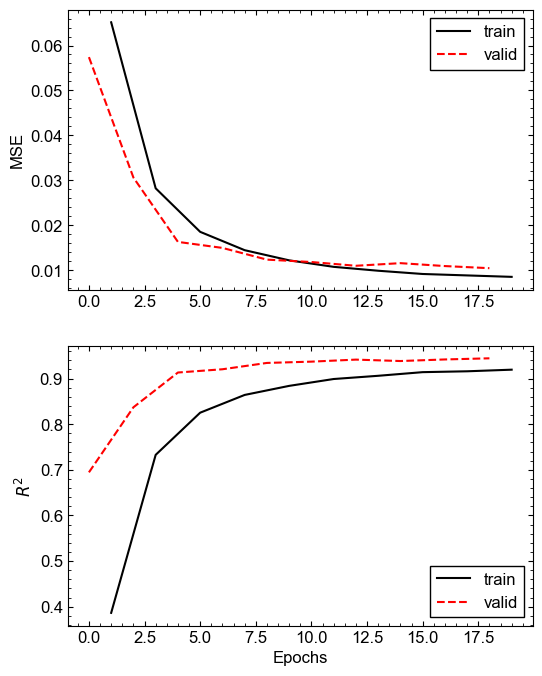

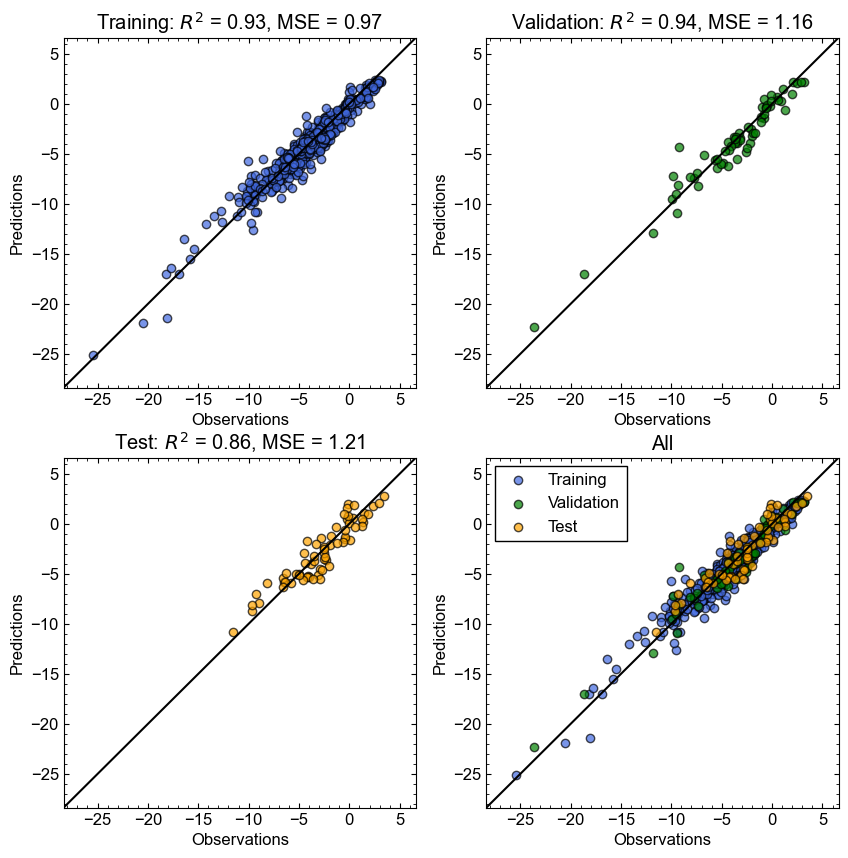

In [2]:
train.main(
    data=data,
    data_name=data_name,
    bayopt_bounds=bayopt_bounds,
    augmentation=config["train"]["augmentation"],
    outdir="./reports/",
    bayopt_n_epochs=config["train"]["bayopt_n_epochs"],
    bayopt_n_iters=config["train"]["bayopt_n_iters"],
    n_epochs=config["train"]["n_epochs"],
    tf16=config["train"]["tf16"],
    loss_func=config["train"]["loss_func"],  # MSE or MAE
    n_gpus=config["train"]["n_gpus"],
    seed=config["train"]["seed"]
)